In [8]:
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#讀取CSV檔案
data = pd.read_csv('Social_Network_Ads.csv')
#看資料集的資訊
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [9]:
#切分input和output
#x作為input
#y作為output
#特徵欄位
x = data.loc[:,['Gender','Age','EstimatedSalary']]
#目標欄位
y = data.loc[:,['Purchased']]
#將屬性轉為數字label
label = preprocessing.LabelEncoder()
X_Gender = label.fit_transform(x.Gender)
#將屬性合併變成list
feature=list(zip(X_Gender,x.Age,x.EstimatedSalary))
#轉成陣列
features = np.asarray(feature)
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size = 0.33, random_state = 1)

In [10]:
model = GaussianNB()
#訓練集訓練模型
#model.fit(X,Y)
model.fit(X_train,y_train.values.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

In [11]:
#測試集測試模型
from sklearn.metrics import confusion_matrix
expected = y_test
predicted = model.predict(X_test)
matrix = confusion_matrix(expected,predicted)
print(matrix)

[[70 11]
 [11 40]]


In [12]:
tn, fp, fn, tp = matrix.ravel()
tp_rate = tp /(tp + fn)
fp_rate = fp /(fp + tn)
accuracy = model.score(X_test,y_test.values.ravel())
print("Accuracy:",accuracy)
print("TP Rate:",tp_rate)
print("FP Rate:",fp_rate)

Accuracy: 0.8333333333333334
TP Rate: 0.7843137254901961
FP Rate: 0.13580246913580246


NAIVE BAYES Auc:  0.9167271847010409


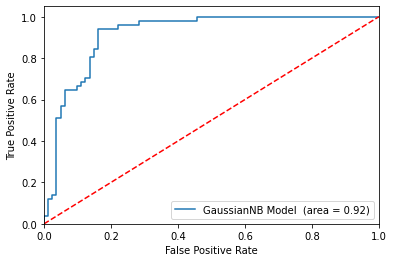

In [13]:
from sklearn.metrics import roc_curve,auc,roc_auc_score
#AUC
y_score = model.predict_proba(X_test)  
roc_auc = roc_auc_score(y_test,  y_score[:, 1])
print ("NAIVE BAYES Auc: ", roc_auc)
#ROC curve
fprate, tprate, thresholds = roc_curve(y_test, y_score[:, 1])
plt.figure()
plt.plot(fprate, tprate, label='GaussianNB Model  (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

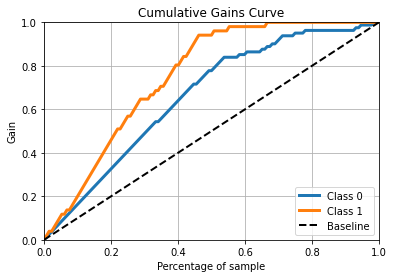

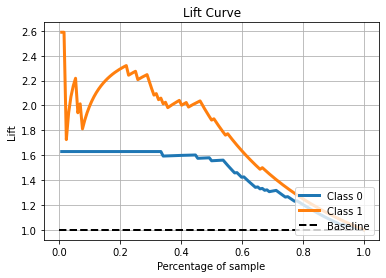

In [14]:
import scikitplot as skplt
#lift chart(又稱Cumulative Gain Chart) 
skplt.metrics.plot_cumulative_gain(y_test, y_score)
plt.show()
#繪出 lift curve
skplt.metrics.plot_lift_curve(y_test, y_score)
plt.show()